In [4]:
import numpy as np
from collections import Counter
#from DecisionTreeRegressor import DecisionTree

In [2]:
from sklearn.tree import DecisionTreeRegressor


# Implement Random Forest

In [42]:
class RandomForest:
    def __init__(self, n_trees = 10, max_depth = 10, min_samples_split = 2, n_features = None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []
        
        
    def fit(self,X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth = self.max_depth,
                                min_samples_split = self.min_samples_split,
                               n_features = self.n_features)
            
            X_sample, y_sample = self._bootstrap_samples(X,y)
            tree.fit(X_sample,y_sample)
            self.trees.append(tree)
            
            
    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace = True)
        return X[idxs], y[idxs]
    
    def _calculate_leaf_value(self, y):
        return np.mean(y)
    
    
    def predict (self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._calculate_leaf_value(pred) for pred in tree_preds])
        return predictions

In [43]:
import pandas as pd

In [44]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Split the Data into Input and Output i.e. X and y

In [45]:
X = dataset.iloc[:, 1 : -1].values
y = dataset.iloc[:, -1].values
print('X Shape :', X.shape)
print('y shape :', y.shape)

X Shape : (10, 1)
y shape : (10,)


# Fit the model to the data

In [46]:
regressor = RandomForest(n_trees = 10, max_depth = 10)
regressor.fit(X,y)

C:\Users\Fakhar E Alam\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Fakhar E Alam\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [47]:
preds = regressor.predict(X)
print(preds,y)

[ 52500.  74000.  75000.  83000. 136000. 200000. 230000. 340000.     nan
     nan] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


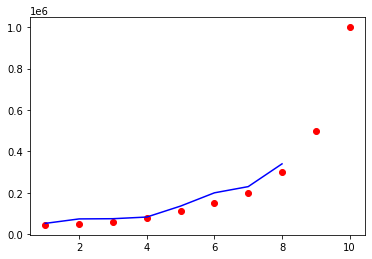

In [48]:
import matplotlib.pyplot as plt
plt.scatter(X,y, color = 'r')
plt.plot(X,regressor.predict(X), color = 'b')

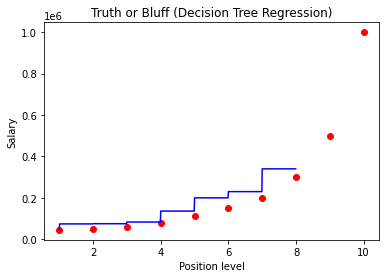

In [49]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Let's See The result of applying decision tree model from sklear on the same dataset

In [50]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=10, max_depth=10)
reg.fit(X,y)
pred = reg.predict(X)
print(pred, y)

[ 47500.  49500.  59000.  78000. 101000. 131000. 205000. 280000. 470000.
 760000.] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


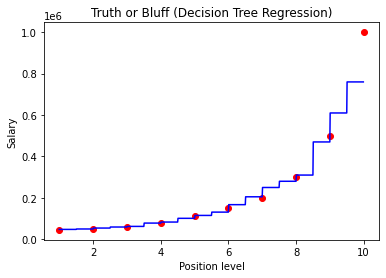

In [52]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()